## Dataset #1: Malicious and Benign Websites
(https://www.kaggle.com/datasets/xwolf12/malicious-and-benign-websites/code)

**Described feature:**
* URL: it is the anonymous identification of the URL analyzed in the study.
* URL_LENGTH: it is the number of characters in the URL.
* NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”.
* CHARSET: it is a categorical value and its meaning is the character encoding standard.
* SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
* CONTENT_LENGTH: it represents the content size of the HTTP header.
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
* WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
* WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM.
* WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed.
* TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client.
* DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP.
* REMOTE_IPS: this variable has the total number of IPs connected to the honeypot.
* APP_BYTES: this is the number of bytes transferred.
* SOURCE_APP_PACKETS: packets sent from the honeypot to the server.
* REMOTE_APP_PACKETS: packets received from the server.
* APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server.
* DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server.
* TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites.

### Importing libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

### Reading dataset

In [29]:
malicious_data = pd.read_csv('../data/dataset_1.csv')
malicious_data.columns = malicious_data.columns.str.lower()
malicious_data.head()

,url,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,whois_regdate,whois_updated_date,...,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [ ]:
malicious_data.shape

### Dataset analysis

In [30]:
malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url                        1781 non-null   object 
 1   url_length                 1781 non-null   int64  
 2   number_special_characters  1781 non-null   int64  
 3   charset                    1774 non-null   object 
 4   server                     1605 non-null   object 
 5   content_length             969 non-null    float64
 6   whois_country              1475 non-null   object 
 7   whois_statepro             1419 non-null   object 
 8   whois_regdate              1654 non-null   object 
 9   whois_updated_date         1642 non-null   object 
 10  tcp_conversation_exchange  1781 non-null   int64  
 11  dist_remote_tcp_port       1781 non-null   int64  
 12  remote_ips                 1781 non-null   int64  
 13  app_bytes                  1781 non-null   int64

In [31]:
malicious_data.isnull().sum()

url                            0
url_length                     0
number_special_characters      0
charset                        7
server                       176
content_length               812
whois_country                306
whois_statepro               362
whois_regdate                127
whois_updated_date           139
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
dtype: int64

### Data cleaning

In [36]:
malicious_data.drop_duplicates(inplace=True)

In [33]:
malicious_data = malicious_data.drop(['content_length', 'whois_country', 'whois_statepro', 'whois_regdate', 'whois_updated_date'], axis=1)
malicious_data = malicious_data.dropna(subset=['server'])
malicious_data = malicious_data.dropna(subset=['charset'])
malicious_data = malicious_data.dropna(subset=['dns_query_times'])

In [37]:
malicious_data.shape

(1598, 16)

### Data visualisation

In [46]:
malicious_data.describe()

,url_length,number_special_characters,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1598.000000,1598.000000,1.598000e+03,1.598000e+03,1598.000000,1598.000000,1598.000000
mean,57.356070,11.204005,15.968711,4.938048,3.020651,3.078750e+03,18.162078,18.440551,1.551936e+04,3.246434e+03,18.162078,2.182103,0.134543
std,27.829029,4.530112,41.570337,21.401240,3.341389,5.916526e+04,42.573382,47.195976,6.829852e+04,5.916732e+04,42.573382,2.801289,0.341342
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,7.000000,0.000000,2.000000,6.760000e+02,8.000000,9.000000,5.740000e+02,7.335000e+02,8.000000,0.000000,0.000000
75%,69.000000,13.000000,21.000000,5.000000,5.000000,2.289250e+03,26.000000,24.000000,9.096750e+03,2.637000e+03,26.000000,4.000000,0.000000
max,249.000000,40.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


<AxesSubplot:xlabel='type'>

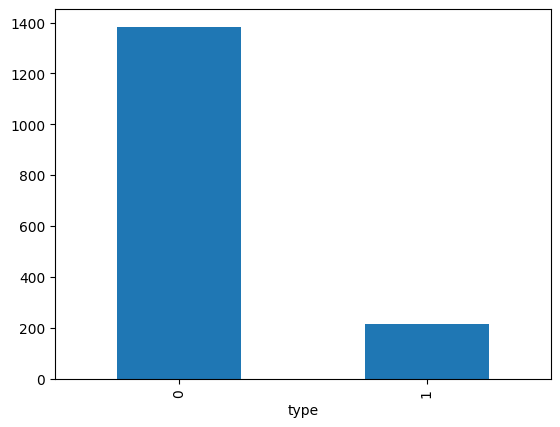

In [38]:
malicious_data['type'].value_counts().plot(kind='bar')

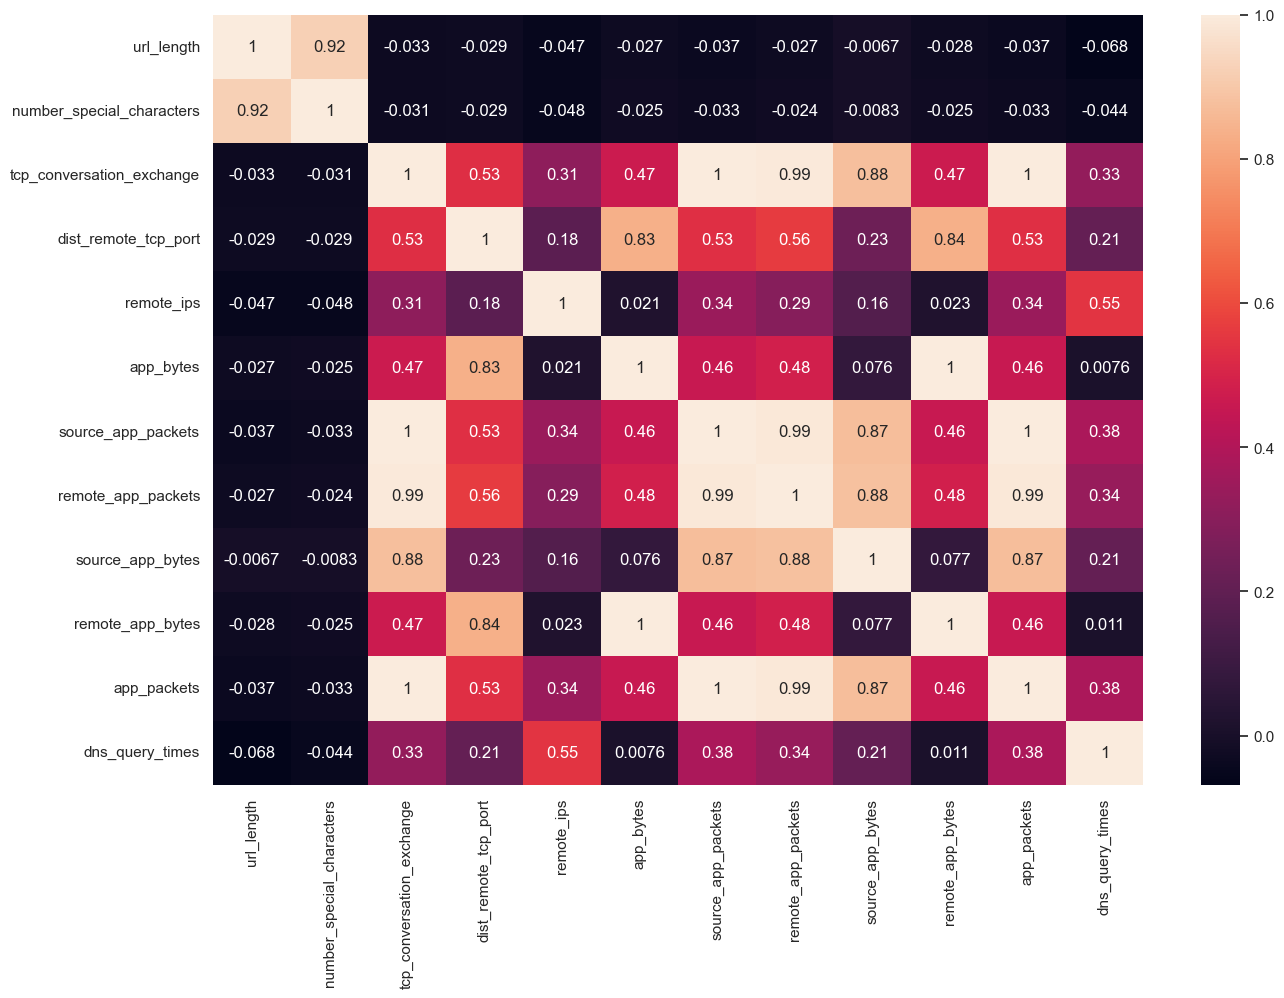

In [45]:
malicious_data_numeric = malicious_data.select_dtypes(['number']) 
sns.set(rc={'figure.figsize': (15, 10)})
sns.heatmap(malicious_data_numeric.iloc[:, :-1].corr(), annot=True)
plt.show()

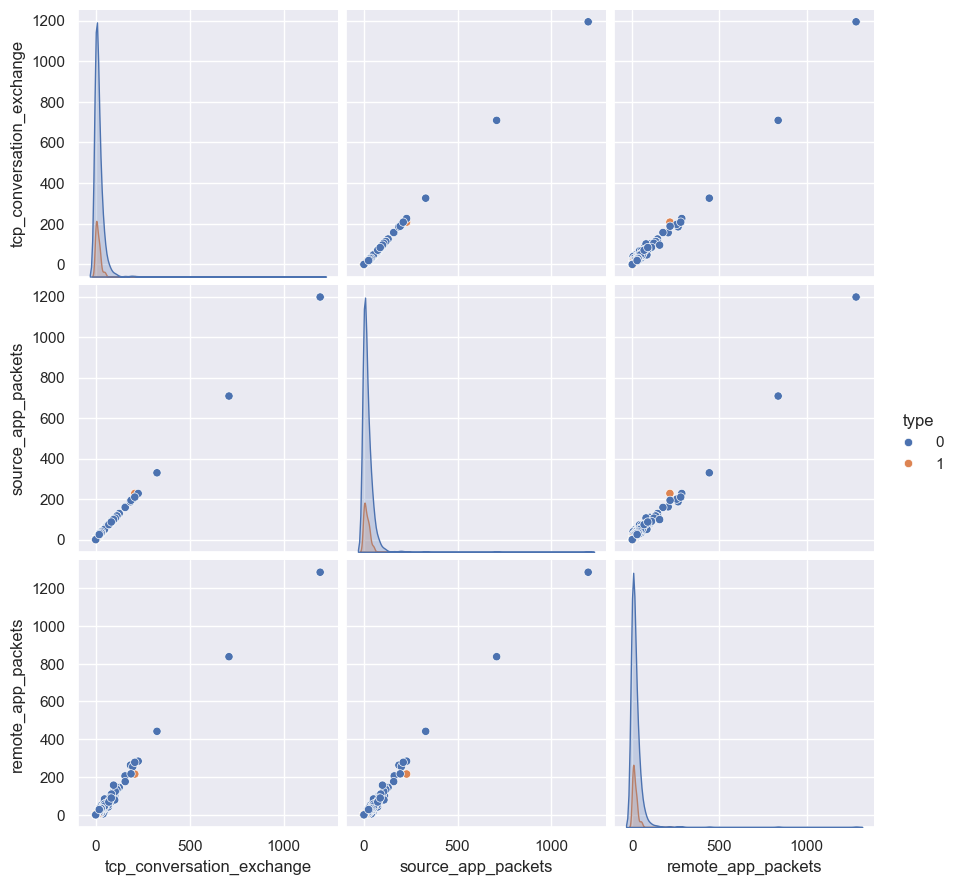

In [52]:
malicious_data_selected = malicious_data[['tcp_conversation_exchange', 'source_app_packets', 'remote_app_packets', 'type']]
sns.pairplot(malicious_data_selected, hue='type', height=3, aspect=1)